<a href="https://colab.research.google.com/github/parichaya-reddy/Homeloanprediction/blob/main/HomeloanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             

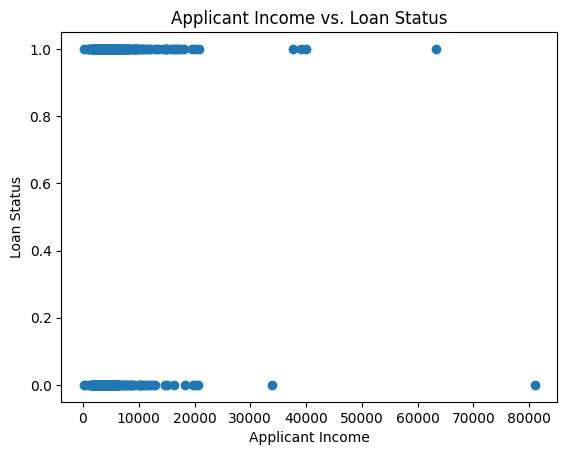

Accuracy: 79.16666666666666
[[14 24]
 [ 1 81]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


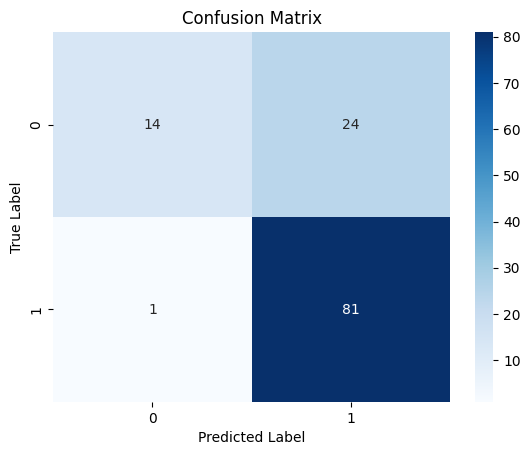

In [ ]:
import pandas as pd #importing all libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

data=pd.read_csv("loan.csv");#reading the data
print(data.head())
num_object_columns = (data.dtypes == 'object').sum()#finding the object datatypes in the data
obj = (data.dtypes == 'object')
for col in data.select_dtypes(include=['object']).columns:#data transforming
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col])
num_object_columns = (data.dtypes == 'object').sum()
print("Number of columns with object data type", num_object_columns)
for col in data.columns:
    if data[col].dtype != 'object':
        data[col] = data[col].fillna(data[col].mean())#handling the missing data
missing_values = data.isna().sum()
print(missing_values)

plt.scatter(data['ApplicantIncome'], data['Loan_Status'])#data visualisation(scatter plot) between income and loan status
plt.title('Applicant Income vs. Loan Status')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Status')
plt.show()
X = data.drop('Loan_Status', axis=1)#splitting the data
y = data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

log_reg = LogisticRegression()#logistic regression
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")#confusion matrix
plt.title("Confusion Matrix")#TN FP FN TP
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
data = pd.read_csv("loan.csv")
print("First 5 rows of dataset:")
print(data.head())


First 5 rows of dataset:
    Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural    

In [ ]:
print("\nEncoding categorical features...")
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Check number of object columns after encoding
num_object_columns = (data.dtypes == 'object').sum()
print("Number of columns with object data type:", num_object_columns)


Encoding categorical features...
Number of columns with object data type: 0


In [ ]:
print("\nHandling missing values...")
for col in data.columns:
    if data[col].dtype != 'object':   # Fill numeric columns with mean
        data[col] = data[col].fillna(data[col].mean())

# Check missing values
missing_values = data.isna().sum()
print("Missing values after handling:\n", missing_values)


Handling missing values...
Missing values after handling:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


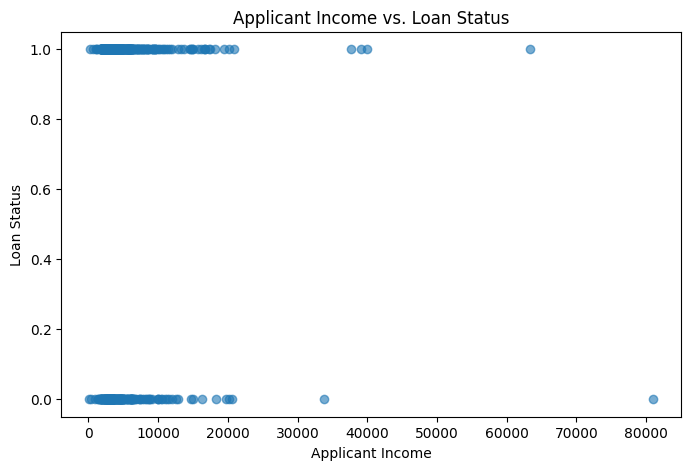

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(data['ApplicantIncome'], data['Loan_Status'], alpha=0.6)
plt.title('Applicant Income vs. Loan Status')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Status')
plt.show()



Model Accuracy: 82.5 %

Confusion Matrix:
 [[15 20]
 [ 1 84]]


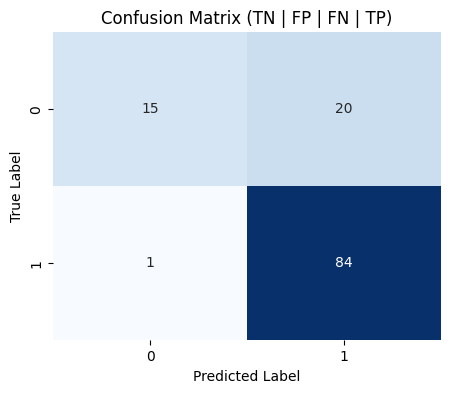

In [ ]:
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", round(accuracy * 100, 2), "%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (TN | FP | FN | TP)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()